# Predicting whether a patient has diabetes or not using Machine Learning

In this notebook, we're going to through a diabetes dataset with the goal of predicting if a patient has diabetes or if they are prediabetic/have diabetes.

## 1. Problem Definition
 > Are we able to predict a patient's diabetes status, given 21 features detailed in surveys?

## 2. Data
The data is downloaded from the Kaggle Diabetes Health Indicators Dataset, which can be found here: https://www.kaggle.com/datasets/julnazz/diabetes-health-indicators-dataset/data

There are 3 datasets, but we will be using the diabetes_binary_health_indicators_BRFSS2021.csv set, which contains survey responses collected by the CDC. The target variables are 0 for non-diabetic, and 1 is for prediabetic/has diabetes. The dataset contains ~236,000 entries.
## 3. Evaluation
> The evaluation metric used will be if the model can predict the target variable at a 50% accuracy using the dependent variables and the random forest classification model.  

## 4. Features
Below details the feature variables found in the dataset. 

** Data Dictionary**

* target: Diabetes (0 = no diabetes, 1 = prediabetes, 2 = diabetes)
  * HighBP: (0 = no high BP, 1 = high BP)
  
* HighChol: (0 = no high cholesterol, 1 = high cholesterol)

* CholCheck: Cholesterol check within past five years (0 = no, 1 = yes)

* 
BM5: Body mass inde

* Smoker: Smoked at least 100 Cigarettes in your entire life? (0 = no, 1 = yes)

* Stroke3:have had a strokes(0 = no, 1 = yes)
  k* HeartDiseaseorAttackD:(Coronary Heart Disease (CHD)ord Myocardial Infarction (MI (0 = no, 1 = yes)
  
* PhysActivity: Physical activity in past 30 days - not including job
  
* FruitsA: Consume Fruit 1 or more per da (0 = no, 1 = yes)
  s* Veggies1A: Consume Vegetables 1 or more per da(0 = no, 1 = yes)p
* HvyAlcoholConsumpHV7: Heavy Alcohol Consumpt
  e* AnyHealthcareHPLN: Have any health insura
  t* NoDocbcCostCOST1: Could Not Afford To See Do"
* GenHlthENHLTH: General health h
* MentHlthENTHLTH: Number of Days Mental Health is Noh
* PhysHlthPHYSHLTH: Number of Days Physical Health is Nk
* DiffWalk
DIFFWALK: Difficulty walking or climbig 
* Sexno")
_SEe
* Age)
_AGEG5YR: 
* Educationvals)
EDUCA: High education i
* Incomeined
INCOME3: Family income (11 categories)

## Preparing the tools for EDA (Exploratory Data Analysis)

In [32]:
# import tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [2]:
# import data
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2021.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [3]:
df.shape

(236378, 22)

In [4]:
df.info

<bound method DataFrame.info of         Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0       0       1.0          1  15.0     1.0     0.0   
1                   1.0       1       0.0          1  28.0     0.0     0.0   
2                   1.0       1       1.0          1  33.0     0.0     0.0   
3                   1.0       0       1.0          1  29.0     0.0     1.0   
4                   0.0       0       0.0          1  24.0     1.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
236373              1.0       1       1.0          1  21.0     0.0     0.0   
236374              0.0       1       0.0          1  25.0     1.0     0.0   
236375              0.0       0       1.0          1  31.0     0.0     0.0   
236376              0.0       1       0.0          1  24.0     0.0     0.0   
236377              0.0       0       1.0          1  32.0     0.0     0.0   

        HeartDiseaseorAttack  P

In [5]:
df.dtypes

Diabetes_binary         float64
HighBP                    int64
HighChol                float64
CholCheck                 int64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                       int64
Age                       int64
Education               float64
Income                  float64
dtype: object

In [6]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
df = df.rename(columns={"Diabetes_binary":"target"})

In [8]:
df.head(10)

,target,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0
5,0.0,1,0.0,1,40.0,1.0,0.0,0.0,1,1,...,1,0.0,3.0,5.0,25.0,1.0,0,10,4.0,8.0
6,0.0,1,1.0,1,27.0,1.0,0.0,0.0,0,0,...,1,0.0,4.0,25.0,0.0,0.0,0,10,5.0,3.0
7,1.0,0,0.0,1,24.0,0.0,0.0,1.0,0,0,...,1,0.0,4.0,0.0,0.0,0.0,1,12,6.0,7.0
8,0.0,1,1.0,1,30.0,0.0,0.0,0.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,7,4.0,6.0
9,0.0,1,1.0,1,36.0,1.0,0.0,0.0,0,0,...,1,0.0,4.0,0.0,0.0,0.0,1,10,4.0,8.0


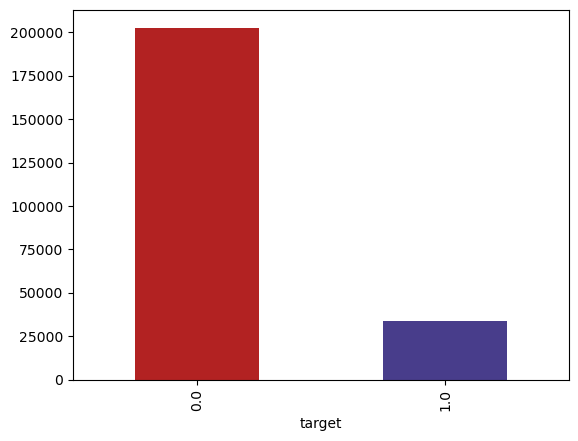

In [9]:
df["target"].value_counts().plot(kind="bar", color=["firebrick", "darkslateblue"]);

In [10]:
pd.crosstab(df.target, df.Sex)

Sex,0,1
target,,
0.0,107328,95482
1.0,16103,17465


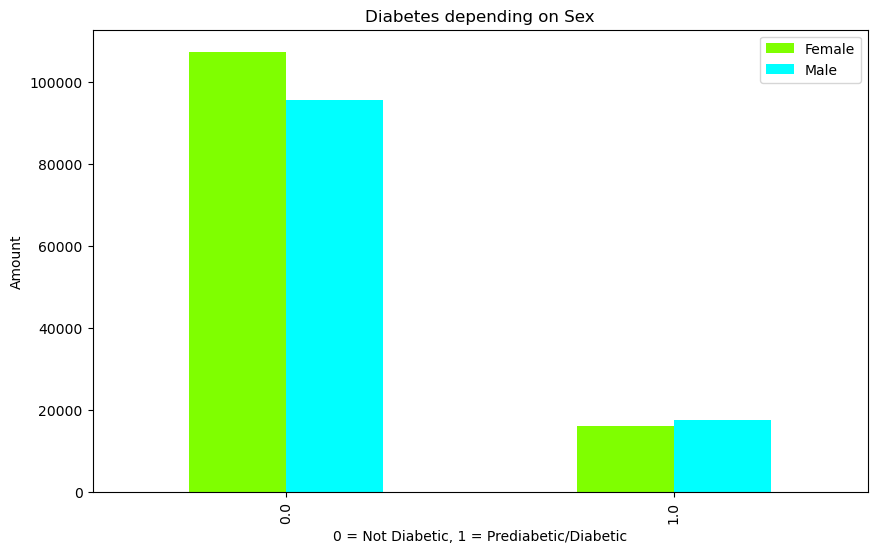

In [11]:
pd.crosstab(df.target, df.Sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["chartreuse", "cyan"])
plt.title("Diabetes depending on Sex")
plt.xlabel("0 = Not Diabetic, 1 = Prediabetic/Diabetic")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);

In [12]:
df.corr()

,target,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
target,1.000000,0.260338,0.197046,0.068585,0.200783,0.056982,0.101557,0.175338,-0.147951,-0.028694,...,0.027671,0.013320,0.278851,0.036099,0.160067,0.209561,0.034585,0.190946,-0.102297,-0.151469
HighBP,0.260338,1.000000,0.283285,0.099415,0.213951,0.099570,0.126594,0.203191,-0.132253,-0.031542,...,0.049833,-0.007477,0.281555,0.011743,0.140946,0.208262,0.067557,0.345390,-0.106342,-0.150292
HighChol,0.197046,0.283285,1.000000,0.098558,0.087188,0.082402,0.085947,0.170668,-0.076648,-0.024408,...,0.056505,-0.012307,0.187101,0.019851,0.104846,0.127667,0.029081,0.287937,-0.035434,-0.068196
CholCheck,0.068585,0.099415,0.098558,1.000000,0.036226,-0.012874,0.025386,0.043867,-0.008454,0.024951,...,0.154640,-0.071406,0.042176,-0.015560,0.031339,0.044966,-0.048143,0.102707,0.030341,0.021765
BMI,0.200783,0.213951,0.087188,0.036226,1.000000,0.016289,0.010241,0.039518,-0.163979,-0.089897,...,-0.009609,0.048165,0.254835,0.088455,0.120976,0.199165,0.007928,-0.050161,-0.098964,-0.102487
Smoker,0.056982,0.099570,0.082402,-0.012874,0.016289,1.000000,0.057064,0.111283,-0.093729,-0.071277,...,-0.023686,0.046932,0.166432,0.084626,0.113428,0.123640,0.073719,0.123354,-0.178179,-0.148127
Stroke,0.101557,0.126594,0.085947,0.025386,0.010241,0.057064,1.000000,0.177667,-0.078759,-0.000428,...,0.015463,0.021849,0.159723,0.045176,0.131955,0.162562,0.001288,0.128892,-0.061672,-0.115004
HeartDiseaseorAttack,0.175338,0.203191,0.170668,0.043867,0.039518,0.111283,0.177667,1.000000,-0.097710,-0.006846,...,0.025104,0.014479,0.239646,0.034660,0.170468,0.194299,0.085596,0.223501,-0.080808,-0.124740
PhysActivity,-0.147951,-0.132253,-0.076648,-0.008454,-0.163979,-0.093729,-0.078759,-0.097710,1.000000,0.118245,...,0.024926,-0.050100,-0.284207,-0.116034,-0.248385,-0.284294,0.058629,-0.119369,0.211932,0.239828
Fruits,-0.028694,-0.031542,-0.024408,0.024951,-0.089897,-0.071277,-0.000428,-0.006846,0.118245,1.000000,...,0.019495,-0.029629,-0.082256,-0.058411,-0.032673,-0.029691,-0.053992,0.071838,0.087289,0.053229


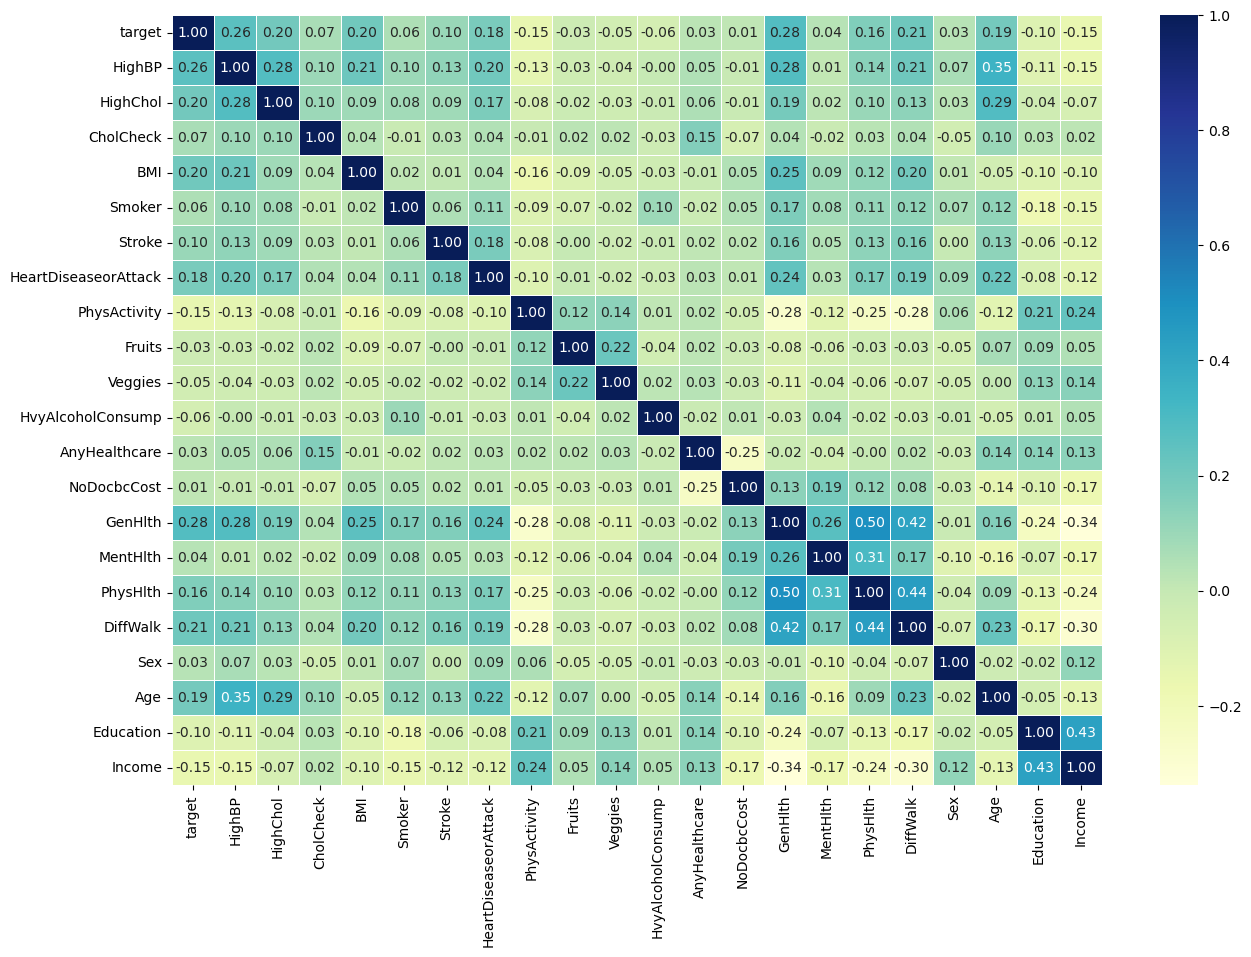

In [13]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [14]:
# Splitting data into X and y, then into train and test sets
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [15]:
%%time
# Random seed so results are replicable
np.random.seed(2)
# Create instance of LogisticRegression model
model = LogisticRegression()
# Fit the model
model.fit(X_train, y_train)
# Score the model
model_score = model.score(X_test, y_test)
model_score

CPU times: total: 7.2 s
Wall time: 2.04 s


C:\Users\jakem\Desktop\c964 capstone\diabetes-health-indicators\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8593789660715797

In [16]:
%%time
# Random seed so results are replicable
np.random.seed(3)
# Create instance of RandomForest model
rf_model = RandomForestClassifier()
# Fit the model
rf_model.fit(X_train, y_train)
# Score the model
rf_model_score = rf_model.score(X_test, y_test)
rf_model_score

CPU times: total: 37.1 s
Wall time: 37.1 s


0.8559099754632372

## Model Comparison

In [17]:
## Create dictionary of scores
model_scores = {"Logistic Regression": model_score,
                "Random Forest": rf_model_score}

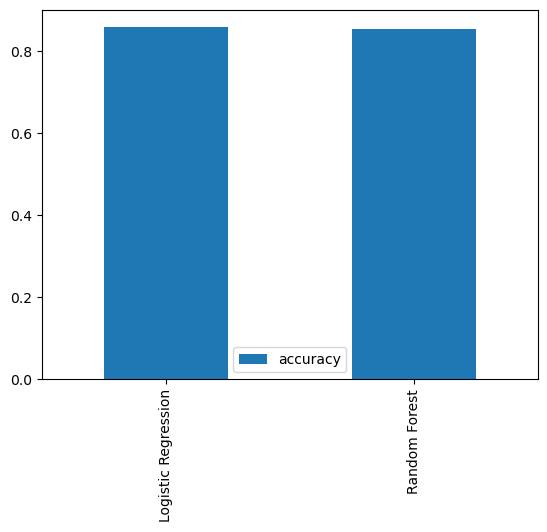

In [18]:
compare_models = pd.DataFrame(model_scores, index=["accuracy"])
compare_models.T.plot.bar();

## Model Predictions
* Confusion Matrix
* Classification Report

In [26]:
# Prediction with RandomForestClassifier model
rf_y_preds = rf_model.predict(X_test)
accuracy_score(y_test, rf_y_preds)

0.8559099754632372

In [31]:
rf_acc_score = accuracy_score(y_test, rf_y_preds) * 100
print(f"Random Forest Classifier model accuracy: {rf_acc_score:.2f}%")

Random Forest Classifier model accuracy: 85.59%


In [20]:
# Prediction with LogisticRegresssion model
y_preds = model.predict(X_test)
accuracy_score(y_test, y_preds)

0.8593789660715797

In [29]:
acc_score = accuracy_score(y_test, y_preds) * 100
print(f"Logistic Regression model accuracy: {acc_score:.2f}%")

Logistic Regression model accuracy: 85.94%


In [21]:
print(confusion_matrix(y_test, y_preds))

[[39685   858]
 [ 5790   943]]


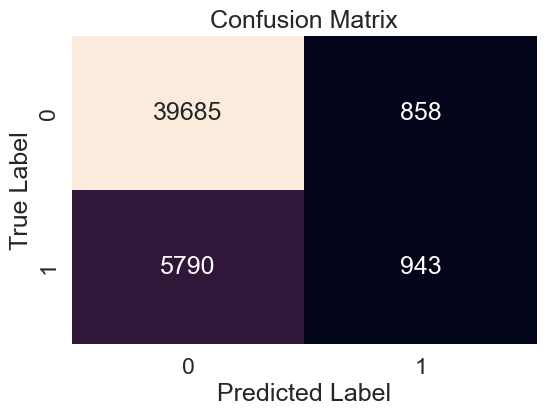

In [22]:
sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 fmt='d',
                 cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix");

In [23]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     40543
         1.0       0.52      0.14      0.22      6733

    accuracy                           0.86     47276
   macro avg       0.70      0.56      0.57     47276
weighted avg       0.82      0.86      0.82     47276

